In [1]:
import pandas as pd
import os

def read_spam():
    category = 'spam'
    directory = './enron1/spam'
    return read_category(category, directory)

def read_ham():
    category = 'ham'
    directory = './enron1/ham'
    return read_category(category, directory)

def read_category(category, directory):
    emails = []
    for filename in os.listdir(directory):
        if not filename.endswith(".txt"):
            continue
        with open(os.path.join(directory, filename), 'r') as fp:
            try:
                content = fp.read()
                emails.append({'name': filename, 'content': content, 'category': category})
            except:
                print(f'skipped {filename}')
    return emails

ham = read_ham()
spam = read_spam()

dfham = pd.DataFrame.from_records(ham)
dfspam = pd.DataFrame.from_records(spam)
df = pd.concat([dfham,dfspam])

skipped 2248.2004-09-23.GP.spam.txt
skipped 2526.2004-10-17.GP.spam.txt
skipped 2698.2004-10-31.GP.spam.txt
skipped 4566.2005-05-24.GP.spam.txt


In [2]:
df

,name,content,category
0,0001.1999-12-10.farmer.ham.txt,Subject: christmas tree farm pictures\n,ham
1,0002.1999-12-13.farmer.ham.txt,"Subject: vastar resources , inc .\ngary , prod...",ham
2,0003.1999-12-14.farmer.ham.txt,Subject: calpine daily gas nomination\n- calpi...,ham
3,0004.1999-12-14.farmer.ham.txt,Subject: re : issue\nfyi - see note below - al...,ham
4,0005.1999-12-14.farmer.ham.txt,Subject: meter 7268 nov allocation\nfyi .\n- -...,ham
...,...,...,...
1491,5163.2005-09-06.GP.spam.txt,Subject: our pro - forma invoice attached\ndiv...,spam
1492,5164.2005-09-06.GP.spam.txt,Subject: str _ rndlen ( 2 - 4 ) } { extra _ ti...,spam
1493,5167.2005-09-06.GP.spam.txt,Subject: check me out !\n61 bb\nhey derm\nbbbb...,spam
1494,5170.2005-09-06.GP.spam.txt,Subject: hot jobs\nglobal marketing specialtie...,spam


In [3]:
df['category'].value_counts()

category
ham     3672
spam    1496
Name: count, dtype: int64

In [ ]:
import re

def preprocessor(e):
    e = re.sub(r'[^a-zA-Z0-9]', ' ', e) 
    e = e.lower()
    e = re.sub(r'\s+', ' ', e)  
    return e

In [5]:
#Prepocessing the columns
df['content']=df['content'].apply(preprocessor)
df['category'] = df['category'].replace({'ham': 0, 'spam': 1})

C:\Users\shard\AppData\Local\Temp\ipykernel_21288\2707859677.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['category'] = df['category'].replace({'ham': 0, 'spam': 1})


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cv= CountVectorizer(preprocessor=preprocessor)


In [28]:

X = cv.fit_transform(df['content']).toarray()
X.shape

(5168, 45738)

In [29]:
y = df['category'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

clf = LogisticRegression(random_state=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)



In [31]:
acc = accuracy_score(y_test, y_pred)
print("Model accuracy (in %):", acc*100)

Model accuracy (in %): 97.48549323017409


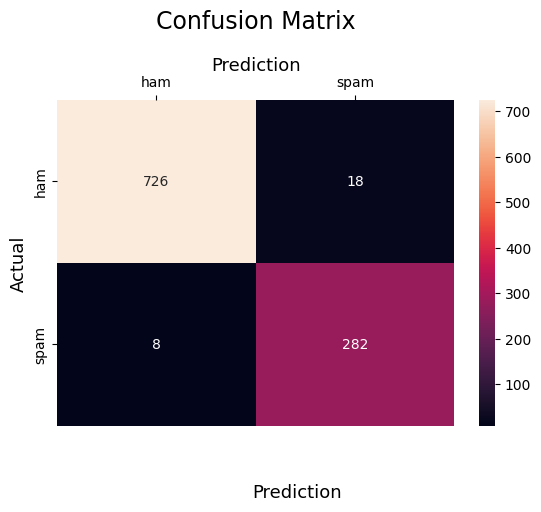

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, 
            annot=True,
            fmt='g', 
            xticklabels=['ham','spam'],
            yticklabels=['ham','spam'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       744
           1       0.94      0.97      0.96       290

    accuracy                           0.97      1034
   macro avg       0.96      0.97      0.97      1034
weighted avg       0.98      0.97      0.97      1034



In [32]:
import joblib

joblib.dump(cv,"vectorizer.joblib")
joblib.dump(clf, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']